In [23]:
import pandas as pd
import numpy as np 


In [63]:
df = pd.read_csv('AirlinesCluster.csv')

In [25]:
df.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


About data 
#Balance = number of miles eligible for award travel
#QualMiles = number of miles qualifying for TopFlight status
#BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
#BonusTrans = number of non-flight bonus transactions in the past 12 months
#FlightMiles = number of flight miles in the past 12 months
#FlightTrans = number of flight transactions in the past 12 months
#DaysSinceEnroll = number of days since enrolled in the frequent flyer program

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
Balance            3999 non-null int64
QualMiles          3999 non-null int64
BonusMiles         3999 non-null int64
BonusTrans         3999 non-null int64
FlightMiles        3999 non-null int64
FlightTrans        3999 non-null int64
DaysSinceEnroll    3999 non-null int64
dtypes: int64(7)
memory usage: 218.8 KB


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
df.describe() 


,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


#### Normalizing the data 

In [29]:
df.isnull().sum()

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64

In [40]:
df1 = df.copy()

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
std = StandardScaler()

In [42]:
df1[df1.columns] = std.fit_transform(df1)

In [43]:
df1.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,5.756558e-16,-7.588884e-17,-5.515024e-16,-2.877696e-15,5.781822e-16,-1.206323e-15,1.406727e-15
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.099918e-01,-1.208203e+00,-3.286033e-01,-3.621679e-01,-1.993611e+00
25%,-5.465676e-01,-1.862987e-01,-6.582276e-01,-8.957878e-01,-3.286033e-01,-3.621679e-01,-8.661823e-01
50%,-3.027332e-01,-1.862987e-01,-4.130308e-01,4.145743e-02,-3.286033e-01,-3.621679e-01,-1.092530e-02
75%,1.866028e-01,-1.862987e-01,2.756198e-01,5.621492e-01,-1.064658e-01,-9.850333e-02,8.097050e-01
max,1.618884e+01,1.422486e+01,1.020957e+01,7.747696e+00,2.168300e+01,1.361205e+01,2.023095e+00


### K-MEANS CLUSTERING  

In [44]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [46]:
cluster_range = range(1,20)
cluster_errors = []
for num_cluster in cluster_range:
    cluster = KMeans(num_cluster,n_init = 10)
    cluster.fit(df1)
    labels = cluster.labels_
    centroids = cluster.cluster_centers_
    cluster_errors.append(cluster.inertia_)
clusters_df  = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,27993.000000
1,2,21988.420792
2,3,18131.402470
3,4,15490.836010
4,5,13519.511219
5,6,12158.273174
6,7,11044.633871
7,8,10110.119005
8,9,9474.852157
9,10,8928.549138


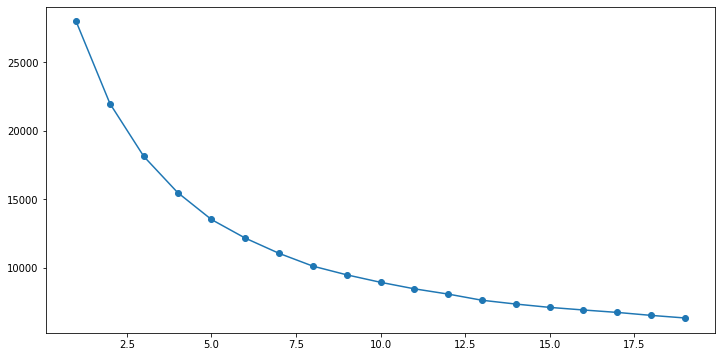

In [47]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker = "o")
plt.show()

In [62]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1[df1.columns])
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))

kmeans_mean_cluster


,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
cluster,,,,,,,
1,38071.4,34.4,6731.6,7.6,179.2,0.6,2285.1
2,191736.3,471.6,33093.3,28.4,5763.1,16.8,4666.4
3,57778.8,54.9,8827.8,9.2,214.5,0.6,5824.9
4,114012.2,5543.3,19196.7,12.3,939.8,2.8,3872.2
5,153292.5,78.7,51298.1,21.3,481.6,1.5,4911.3


In [66]:
from scipy.cluster.h.ierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
margings = linkage(df1,method = 'complete',metric='euclidean')
dendrogram(margings)
plt.show()

## Hierarchical Clustering

In [64]:
df1_std = std.fit_transform(df1)